<a href="https://colab.research.google.com/github/codyub/ESAA/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B82_%EB%B3%91%EC%9B%90%EA%B0%9C%ED%8F%90%EC%97%85%EB%B6%84%EB%A5%98(%EC%A0%9C%EC%B6%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 필요한 모듈과 데이터 로딩

In [80]:
#기본 모듈 불러오기
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

os.chdir("/content/drive/MyDrive/ESAA/프로젝트2_병원개폐업_분류예측/9565_hospital_data/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
#Reading the train and test files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission_sample= pd.read_csv('submission_sample.csv')

## 데이터 전처리

### 영향을 미치는 중요한 변수 추출

In [82]:
train = train[['OC','revenue1','profit1','receivableS1','debt1','longLoan1','surplus1','employee1','employee2']]
train.head()

,OC,revenue1,profit1,receivableS1,debt1,longLoan1,surplus1,employee1,employee2
0,open,4.217530e+09,225169678.0,4.700557e+08,6.828260e+08,3.510000e+08,1.496394e+09,62.0,64.0
1,open,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0
2,open,1.004522e+09,41864754.0,8.095950e+06,9.241434e+07,0.000000e+00,0.000000e+00,234.0,1.0
3,open,7.250734e+10,902830288.0,0.000000e+00,4.236380e+10,7.253040e+09,8.643659e+09,663.0,663.0
4,open,4.904354e+10,80749696.0,4.099320e+09,4.989811e+10,1.350000e+10,9.025550e+09,206.0,197.0


In [83]:
test = test[['revenue1','profit1','receivableS1','debt1','longLoan1','surplus1','employee1','employee2']]
test.head()

,revenue1,profit1,receivableS1,debt1,longLoan1,surplus1,employee1,employee2
0,6.682486e+10,5.036692e+08,7.242580e+08,6.769090e+10,6.319097e+09,8.944587e+09,693,693
1,3.495758e+10,4.525557e+08,6.610290e+08,6.626737e+10,1.720000e+10,1.046277e+10,379,371
2,2.326031e+10,-2.148749e+09,7.337107e+09,0.000000e+00,0.000000e+00,1.638540e+10,NaN,NaN
3,0.000000e+00,2.789663e+09,0.000000e+00,2.891880e+10,0.000000e+00,0.000000e+00,760,760
4,5.037025e+10,3.346675e+09,1.104000e+08,4.921637e+10,9.976421e+09,1.492691e+10,437,385


### 데이터 기본 정보 확인

In [84]:
train.shape # 301개의 instance와 10개의 피처가 있음. 

(301, 9)

In [85]:
train.info()   # 피처의 타입과 Null 값 알아보기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OC            301 non-null    object 
 1   revenue1      293 non-null    float64
 2   profit1       293 non-null    float64
 3   receivableS1  293 non-null    float64
 4   debt1         293 non-null    float64
 5   longLoan1     293 non-null    float64
 6   surplus1      293 non-null    float64
 7   employee1     291 non-null    float64
 8   employee2     288 non-null    float64
dtypes: float64(8), object(1)
memory usage: 21.3+ KB


In [86]:
train['OC'].value_counts() # 불균형 데이터임을 확인할 수 있다

open      286
 close     15
Name: OC, dtype: int64

In [87]:
train.describe()      # 각 피처의 값 분포 간단히 확인

,revenue1,profit1,receivableS1,debt1,longLoan1,surplus1,employee1,employee2
count,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,291.000000,288.000000
mean,1.288175e+10,2.101700e+08,6.975862e+08,8.765310e+09,2.646564e+09,1.265935e+09,142.546392,134.326389
std,2.043543e+10,1.134673e+09,1.455332e+09,1.286112e+10,4.697523e+09,8.248321e+09,160.191073,151.061786
min,0.000000e+00,-4.696701e+09,0.000000e+00,0.000000e+00,0.000000e+00,-2.914970e+09,0.000000,0.000000
25%,3.252112e+09,-2.168279e+06,0.000000e+00,1.953077e+09,0.000000e+00,0.000000e+00,53.500000,53.750000
50%,5.524218e+09,8.130751e+07,2.158564e+08,4.457667e+09,1.136776e+09,0.000000e+00,80.000000,79.000000
75%,1.274839e+10,2.930329e+08,6.940605e+08,9.437917e+09,3.327098e+09,1.261600e+08,181.500000,170.000000
max,1.510000e+11,7.475427e+09,1.409257e+10,8.669725e+10,4.112490e+10,1.340000e+11,1200.000000,1200.000000


> 문제점: 직원의 min값이 0 /revenue가 0
--> 해결책: NAN 값인 것으로 추정하여 변환했을 것.

In [88]:
train.isna().sum()     # NaN 값 있는지 확인

OC               0
revenue1         8
profit1          8
receivableS1     8
debt1            8
longLoan1        8
surplus1         8
employee1       10
employee2       13
dtype: int64

### train 데이터 결측치 처리

In [89]:
for i in ['revenue1','profit1','receivableS1','debt1','longLoan1','surplus1','employee1','employee2']:
  train[i] = train[i].fillna(train[i].mean())

train.head()

,OC,revenue1,profit1,receivableS1,debt1,longLoan1,surplus1,employee1,employee2
0,open,4.217530e+09,2.251697e+08,4.700557e+08,6.828260e+08,3.510000e+08,1.496394e+09,62.0,64.0
1,open,1.288175e+10,2.101700e+08,6.975862e+08,8.765310e+09,2.646564e+09,1.265935e+09,801.0,813.0
2,open,1.004522e+09,4.186475e+07,8.095950e+06,9.241434e+07,0.000000e+00,0.000000e+00,234.0,1.0
3,open,7.250734e+10,9.028303e+08,0.000000e+00,4.236380e+10,7.253040e+09,8.643659e+09,663.0,663.0
4,open,4.904354e+10,8.074970e+07,4.099320e+09,4.989811e+10,1.350000e+10,9.025550e+09,206.0,197.0


In [90]:
train.isna().sum()      # NaN 값이 사라졌음을 확인

OC              0
revenue1        0
profit1         0
receivableS1    0
debt1           0
longLoan1       0
surplus1        0
employee1       0
employee2       0
dtype: int64

In [91]:
train.describe()    # 결측치 처리 후에도 min 값에 여전히 0이 존재해

,revenue1,profit1,receivableS1,debt1,longLoan1,surplus1,employee1,employee2
count,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,301.000000,301.000000
mean,1.288175e+10,2.101700e+08,6.975862e+08,8.765310e+09,2.646564e+09,1.265935e+09,142.546392,134.326389
std,2.016112e+10,1.119442e+09,1.435796e+09,1.268848e+10,4.634466e+09,8.137600e+09,157.498594,147.752533
min,0.000000e+00,-4.696701e+09,0.000000e+00,0.000000e+00,0.000000e+00,-2.914970e+09,0.000000,0.000000
25%,3.279139e+09,0.000000e+00,7.203600e+04,2.029170e+09,0.000000e+00,0.000000e+00,54.000000,56.000000
50%,5.676235e+09,9.353360e+07,2.401758e+08,4.719856e+09,1.390000e+09,0.000000e+00,84.000000,80.000000
75%,1.288175e+10,2.882976e+08,6.975862e+08,9.265154e+09,3.242405e+09,2.209221e+08,177.000000,161.000000
max,1.510000e+11,7.475427e+09,1.409257e+10,8.669725e+10,4.112490e+10,1.340000e+11,1200.000000,1200.000000


In [92]:
train[train['employee1']==0].count() # 직원이 0명인 병원 존재 확인

OC              1
revenue1        1
profit1         1
receivableS1    1
debt1           1
longLoan1       1
surplus1        1
employee1       1
employee2       1
dtype: int64

In [93]:
train[train['employee2']==0].count() # 직원이 0명인 병원 존재 확인

OC              2
revenue1        2
profit1         2
receivableS1    2
debt1           2
longLoan1       2
surplus1        2
employee1       2
employee2       2
dtype: int64

### test 데이터 결측치 처리

#### test 안 1000 이상의 숫자에는 쉼표 존재하니 대체 후 숫자형으로 변환

In [94]:
test.employee1 = test.employee1.astype('str').str.replace(",", "").astype('float')
test.employee2 = test.employee2.astype('str').str.replace(",", "").astype('float')

In [95]:
for i in ['revenue1','profit1','receivableS1','debt1','longLoan1','surplus1','employee1','employee2']:
  test[i] = test[i].fillna(test[i].mean())

test.head()

,revenue1,profit1,receivableS1,debt1,longLoan1,surplus1,employee1,employee2
0,6.682486e+10,5.036692e+08,7.242580e+08,6.769090e+10,6.319097e+09,8.944587e+09,693.000000,693.000000
1,3.495758e+10,4.525557e+08,6.610290e+08,6.626737e+10,1.720000e+10,1.046277e+10,379.000000,371.000000
2,2.326031e+10,-2.148749e+09,7.337107e+09,0.000000e+00,0.000000e+00,1.638540e+10,204.252101,189.223214
3,0.000000e+00,2.789663e+09,0.000000e+00,2.891880e+10,0.000000e+00,0.000000e+00,760.000000,760.000000
4,5.037025e+10,3.346675e+09,1.104000e+08,4.921637e+10,9.976421e+09,1.492691e+10,437.000000,385.000000


In [96]:
test.isna().sum()

revenue1        0
profit1         0
receivableS1    0
debt1           0
longLoan1       0
surplus1        0
employee1       0
employee2       0
dtype: int64

In [97]:
test.describe()

,revenue1,profit1,receivableS1,debt1,longLoan1,surplus1,employee1,employee2
count,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,127.000000,127.000000
mean,1.824446e+10,3.940712e+08,8.704763e+08,1.337752e+10,4.204390e+09,1.985867e+09,204.252101,189.223214
std,3.108561e+10,1.799012e+09,2.209799e+09,2.000473e+10,5.842779e+09,5.525423e+09,268.358154,228.108604
min,0.000000e+00,-5.734451e+09,0.000000e+00,0.000000e+00,0.000000e+00,-8.636718e+09,16.000000,0.000000
25%,3.240799e+09,1.060223e+07,1.562800e+06,2.180943e+09,4.075000e+08,0.000000e+00,62.000000,61.000000
50%,7.076517e+09,1.476913e+08,2.219080e+08,5.326224e+09,2.046971e+09,0.000000e+00,111.000000,117.000000
75%,1.761396e+10,4.502115e+08,9.557822e+08,1.476248e+10,5.022411e+09,1.332249e+09,216.000000,190.500000
max,1.810000e+11,1.120816e+10,2.144183e+10,1.290000e+11,2.642532e+10,3.411471e+10,1816.000000,1547.000000


### 데이터 분포도 확인 및 시각화

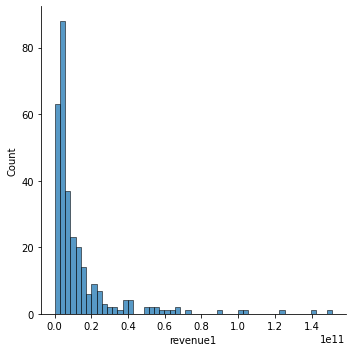

In [98]:
sns.displot(train['revenue1'])

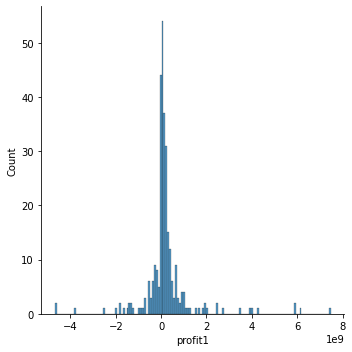

In [99]:
sns.displot(train['profit1'])

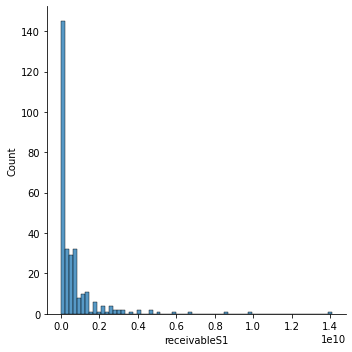

In [100]:
sns.displot(train['receivableS1'])

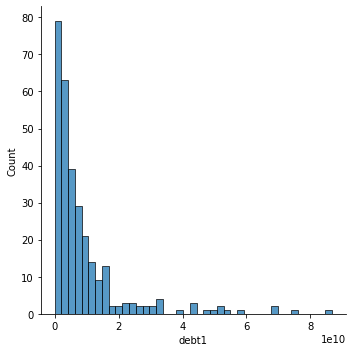

In [101]:
sns.displot(train['debt1'])

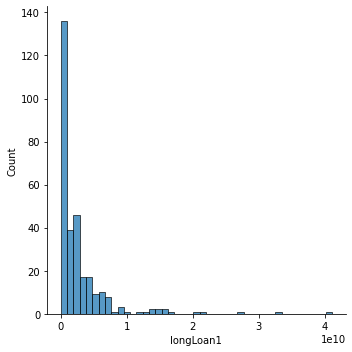

In [102]:
sns.displot(train['longLoan1'])

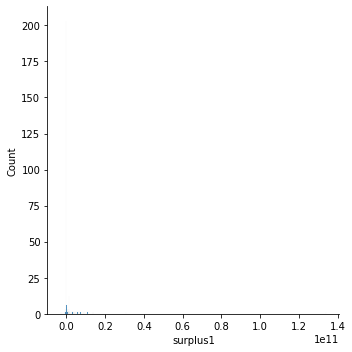

In [103]:
sns.displot(train['surplus1'])

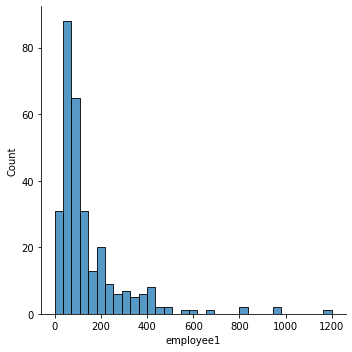

In [104]:
sns.displot(train['employee1'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


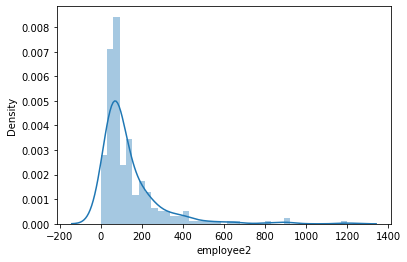

In [105]:
sns.distplot(train['employee2'])

### 데이터의 분포가 불균형하여 로그변환

In [106]:
for i in ['revenue1','receivableS1','debt1','longLoan1','employee1','employee2']:
  train[i] = np.log1p(train[i])

train.head()

,OC,revenue1,profit1,receivableS1,debt1,longLoan1,surplus1,employee1,employee2
0,open,22.162515,2.251697e+08,19.968362,20.341751,19.676297,1.496394e+09,4.143135,4.174387
1,open,23.279077,2.101700e+08,20.363137,22.894068,21.696528,1.265935e+09,6.687109,6.701960
2,open,20.727778,4.186475e+07,15.906875,18.341793,0.000000,0.000000e+00,5.459586,0.693147
3,open,25.006954,9.028303e+08,0.000000,24.469560,22.704687,8.643659e+09,6.498282,6.498282
4,open,24.615974,8.074970e+07,22.134087,24.633249,23.325956,9.025550e+09,5.332719,5.288267


In [107]:
for i in ['revenue1','receivableS1','debt1','longLoan1','employee1','employee2']:
  test[i] = np.log1p(test[i])

test.head()

,revenue1,profit1,receivableS1,debt1,longLoan1,surplus1,employee1,employee2
0,24.925341,5.036692e+08,20.400658,24.938218,22.566842,8.944587e+09,6.542472,6.542472
1,24.277401,4.525557e+08,20.309308,24.916963,23.568175,1.046277e+10,5.940171,5.918894
2,23.870014,-2.148749e+09,22.716210,0.000000,0.000000,1.638540e+10,5.324239,5.248198
3,0.000000,2.789663e+09,0.000000,24.087758,0.000000,0.000000e+00,6.634633,6.634633
4,24.642667,3.346675e+09,18.519621,24.619492,23.023490,1.492691e+10,6.082219,5.955837


### train 데이터 레이블과 피처로 나누기

In [108]:
y_train = train['OC']
X_train = train.iloc[:,1:]

In [109]:
X_train.head()

,revenue1,profit1,receivableS1,debt1,longLoan1,surplus1,employee1,employee2
0,22.162515,2.251697e+08,19.968362,20.341751,19.676297,1.496394e+09,4.143135,4.174387
1,23.279077,2.101700e+08,20.363137,22.894068,21.696528,1.265935e+09,6.687109,6.701960
2,20.727778,4.186475e+07,15.906875,18.341793,0.000000,0.000000e+00,5.459586,0.693147
3,25.006954,9.028303e+08,0.000000,24.469560,22.704687,8.643659e+09,6.498282,6.498282
4,24.615974,8.074970e+07,22.134087,24.633249,23.325956,9.025550e+09,5.332719,5.288267


In [110]:
y_train.head()

0    open
1    open
2    open
3    open
4    open
Name: OC, dtype: object

In [111]:
y_train = pd.get_dummies(y_train)
y_train = y_train.iloc[:,0]
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name:  close, dtype: uint8

## 분류 알고리즘 적용

### 랜덤포레스트

In [112]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
rf_clf_pred = rf_clf.predict(test)
rf_clf_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

### 결정트리

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_clf = DecisionTreeClassifier(random_state=42)

params = {'max_leaf_nodes' : list(range(2,100)),'min_samples_split' : [2,3,4]}

grid_search_cv = GridSearchCV(tree_clf,param_grid=params,cv=3,n_jobs=-1,verbose=1)
grid_search_cv.fit(X_train,y_train)
y_pred = grid_search_cv.best_estimator_.predict(test)
y_pred

Fitting 3 folds for each of 294 candidates, totalling 882 fits


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

### LightGBM

In [114]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)
lgbm_pred = lgbm.predict(test)
lgbm_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

### XGBClassifier

In [115]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(test)
xgb_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

# 제출 데이터 뽑아내기

In [121]:
submission_sample['OC'] = list(xgb_pred)
xgb_csv = submission_sample
xgb_csv.head()
xgb_csv.to_csv('xgb_csv_fin.csv', index=False, encoding="utf-8")

In [122]:
submission_sample['OC'] = list(lgbm_pred)
lgbm_csv = submission_sample
lgbm_csv.head()
lgbm_csv.to_csv('lgbm_csv_fin.csv', index=False, encoding="utf-8")

In [123]:
submission_sample['OC'] = list(rf_clf_pred)
rf_csv = submission_sample
rf_csv.head()
rf_csv.to_csv('rf_csv_fin.csv', index=False, encoding="utf-8")

In [124]:
submission_sample['OC'] = list(y_pred)
dt_csv = submission_sample
dt_csv.head()
dt_csv.to_csv('dt_csv_fin.csv', index=False, encoding="utf-8")